In [1]:
import sys
import json
import pandas as pd
import torch as tc
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from build_dataset import get_dataloaders
from experiment import model_pipeline
from utils import JsonManager, set_seed, load_config
from plots import *

In [3]:
cfg = load_config(path=f"../config.yaml")
print(json.dumps(vars(cfg), indent=2))

set_seed(cfg.seed)
device = "cuda" if tc.cuda.is_available() else "cpu"

{
  "dataset": "housing",
  "fig_path": "../outputs/",
  "seed": 42,
  "dpi": 400,
  "normalize": "StandardScaler",
  "data_split": 0.2,
  "batch_size": 128
}


In [11]:
folder = "../experiments/"
subfolder = "base_model/"
fpath = folder + subfolder

json_manager = JsonManager(folder)
prms = json_manager.load(subfolder + "params.json")
print(json.dumps(vars(prms), indent=4))

{
    "model_version": "baseline",
    "epochs": 15,
    "learning_rate": 0.0001,
    "hidden_dim": 64,
    "dropout": 0.0
}


### Data visualization

In [5]:
df_housing = fetch_california_housing(as_frame=True).frame

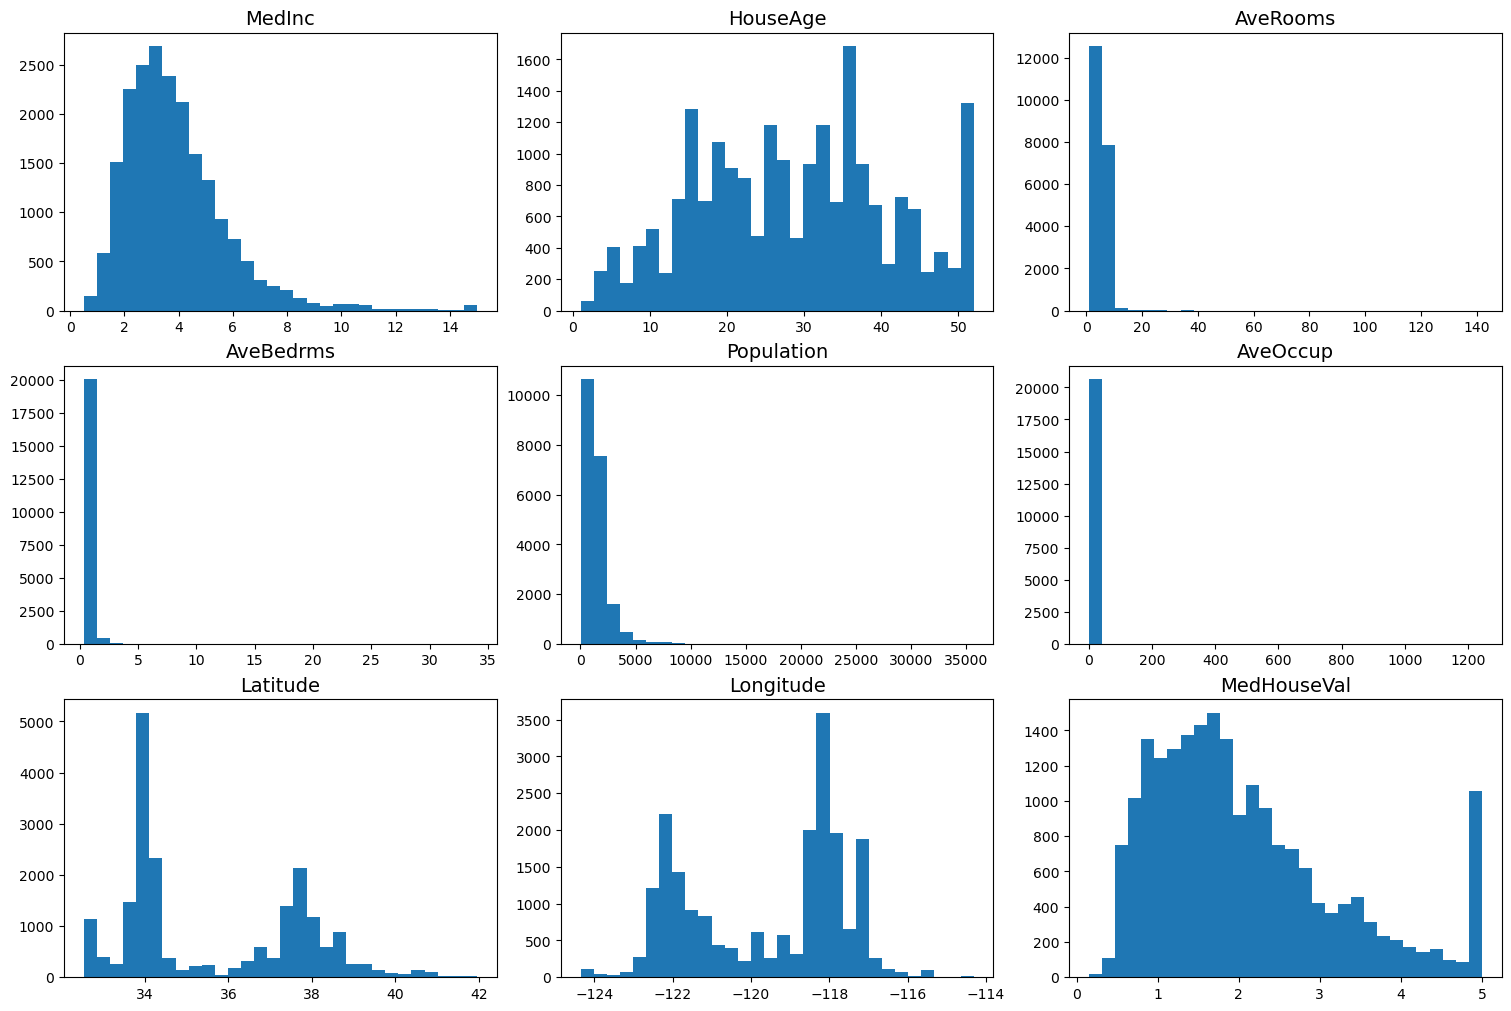

In [6]:
plot_feature_distributions(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

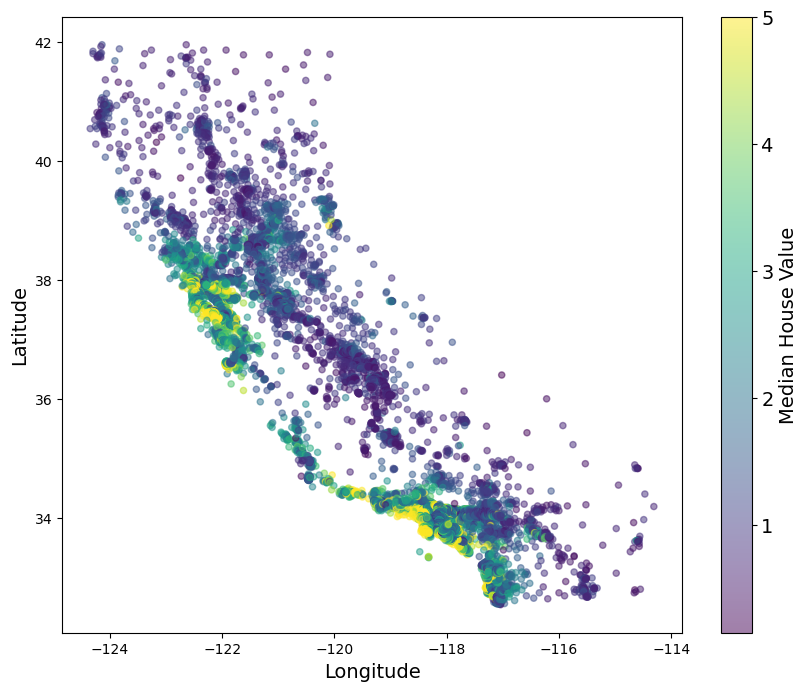

In [7]:
plot_price_by_location(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

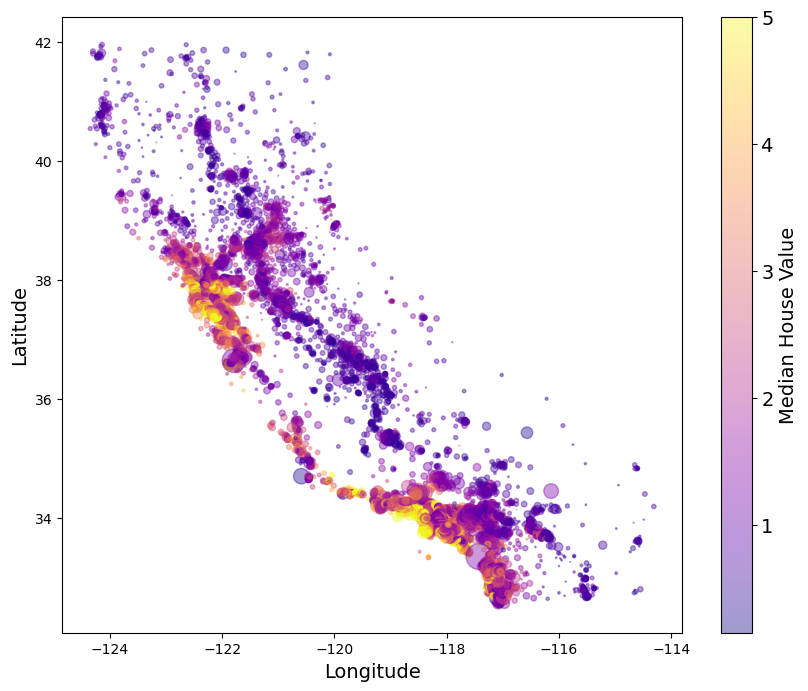

In [8]:
plot_population_and_prices(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

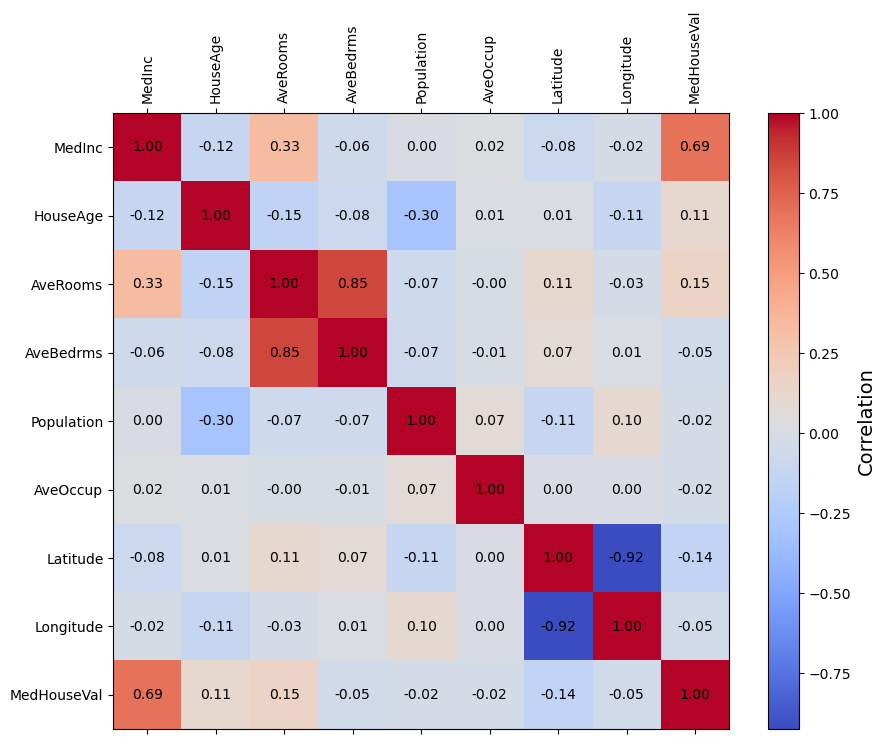

In [9]:
plot_correlation_map(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

## Training

In [10]:
train, val, test = get_dataloaders(cfg.dataset, cfg.normalize, 
                                   cfg.data_split, cfg.batch_size, cfg.seed)
test_metrics = model_pipeline(train, val, test, prms, cfg, fpath, device, plot=True)

NameError: name 'fpath' is not defined

In [ ]:
plot_pca(train, cfg.fig_path, cfg.dpi, cfg.dataset, n_components=2)

In [ ]:
plot_t_sne(train, cfg.fig_path, cfg.dpi, cfg.dataset, n_components=2, iter_size=50)